In [18]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf
import numpy as np
from operator import itemgetter
import time
import heapq
import matplotlib.pyplot as plt

# import sys
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

%matplotlib notebook

### Importing MNIST dataset

In [19]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Xavier Initialization 

In [20]:
def weight_variable (shape):
    initial = tf.truncated_normal(shape, stddev = np.sqrt(2.0/sum(shape)) )
    return tf.Variable(initial)

def bias_variable (shape):
#     initial = tf.constant(0.1, shape=shape)
    initial = tf.truncated_normal(shape, stddev = np.sqrt(1.0/sum(shape)) )
    return tf.Variable(initial)

### Create the model

In [43]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
# W = tf.Variable(tf.zeros([784, 10]))
# b = tf.Variable(tf.zeros([10]))
# y = tf.matmul(x, W) + b

W_1 = weight_variable([784, 1024])
b_1 = bias_variable([1024])

W_2 = weight_variable([1024, 1024])
b_2 = bias_variable([1024])

W_3 = weight_variable([1024, 1024])
b_3 = bias_variable([1024])

W_4 = weight_variable([1024, 1024])
b_4 = bias_variable([1024])

W_5 = weight_variable([1024, 10])
b_5 = bias_variable([10])

y_1 = tf.nn.relu(tf.matmul(x, W_1) + b_1)
y_2 = tf.nn.relu(tf.matmul(y_1, W_2) + b_2)
y_3 = tf.nn.relu(tf.matmul(y_2, W_3) + b_3)
y_4 = tf.nn.relu(tf.matmul(y_3, W_4) + b_4)
y = tf.matmul(y_4, W_5) + b_5 # predicted

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10]) # original

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
train_step = tf.train.AdamOptimizer().minimize(cross_entropy)

### Run the model (q1, q2)

In [44]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.33
sess = tf.InteractiveSession(config=config)
# sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(1000)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))

Accuracy: 0.9813


### Last (5th) Layer vizualization (q3)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []} (1000, 10)
0 [(10, 1.0), (13, 1.0), (25, 1.0), (28, 1.0), (55, 1.0), (69, 1.0), (71, 1.0), (101, 1.0), (136, 1.0), (148, 1.0)]
1 [(5, 1.0), (14, 1.0), (39, 1.0), (57, 1.0), (135, 1.0), (137, 1.0), (143, 1.0), (168, 1.0), (176, 1.0), (178, 1.0)]
2 [(1, 1.0), (47, 1.0), (77, 1.0), (82, 1.0), (147, 1.0), (174, 1.0), (186, 1.0), (208, 1.0), (236, 1.0), (237, 1.0)]
3 [(30, 1.0), (32, 1.0), (51, 1.0), (68, 1.0), (76, 1.0), (112, 1.0), (205, 1.0), (216, 1.0), (270, 1.0), (309, 1.0)]
4 [(19, 1.0), (27, 1.0), (48, 1.0), (56, 1.0), (85, 1.0), (103, 1.0), (109, 1.0), (117, 1.0), (163, 1.0), (166, 1.0)]
5 [(15, 1.0), (23, 1.0), (102, 1.0), (129, 1.0), (132, 1.0), (152, 1.0), (162, 1.0), (165, 1.0), (187, 1.0), (218, 1.0)]
6 [(11, 1.0), (50, 1.0), (54, 1.0), (88, 1.0), (91, 1.0), (100, 1.0), (123, 1.0), (130, 1.0), (131, 1.0), (138, 1.0)]
7 [(17, 1.0), (34, 1.0), (60, 1.0), (64, 1.0), (70, 1.0), (75, 1.0), (83, 1.0), (86, 1.0), 

<IPython.core.display.Javascript object>


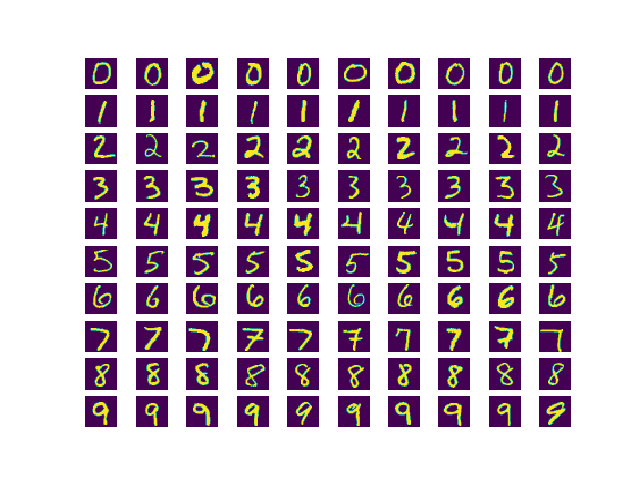

In [45]:
y_est = tf.nn.softmax(y)
# ce = cross_entropy(sm)
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# Display grid, class->10, test_example->10
grid = np.zeros( (10,10) )

# print("Accuracy:",sess.run([accuracy, y_est], feed_dict={x: mnist.test.images[:20,],
#                                       y_: mnist.test.labels[:20,]}))

_,y_np=sess.run([accuracy, y_est], feed_dict={x: mnist.test.images[:1000,],
                                      y_: mnist.test.labels[:1000,]})

# print(y_np)  

# for r in range(y_np.shape[0]):
#     i, m = np.argmax(y_np[r]), np.amax(y_np[r])
#     y_np[r]= np.zeros(10)
#     y_np[r,i] = m
    
# print(y_np)

# y_np = y_np.T
# print (y_np.shape, type(y_np))

# for c in range(10):
#     grid[c] = heapq.nlargest(10, range(1000), y_np[c].take)
#     indx = [x for x in grid[c] if y_np[c,x]>0]
    
# print("Grid:", grid)

class_dict = dict()
for c in range(10):
    class_dict[c]=[]
    
print(class_dict,y_np.shape)

for r in range(y_np.shape[0]):
    key = np.argmax(y_np[r])
    class_dict[key].append( (r, np.amax(y_np[r]) ) )
    
for x in range(10):
    class_dict[x].sort(key=itemgetter(1),reverse=True)
    if len(class_dict[x]) > 10:
        class_dict[x] = class_dict[x][0:10]
    print(x, class_dict[x])

    
%matplotlib notebook
plt.figure()

c=0
for key in range(10):
    i=0
    for elem in class_dict[key]:
        plt.subplot(10,10,(c*10+i)+1)
        plt.imshow( mnist.test.images[int(elem[0])].reshape((28,28)) )
    #     plt.imshow(X[:,i].reshape((21,21)))
        plt.axis('off')
        plt.show()
        i +=1
    c+=1

### Ploting last layer (q3) 

<IPython.core.display.Javascript object>


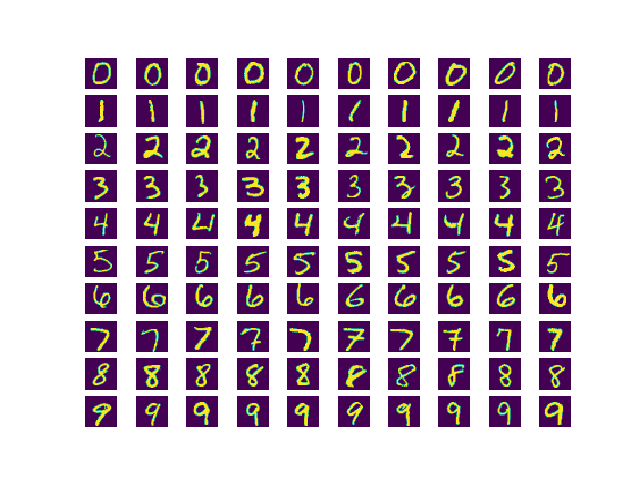

In [8]:
%matplotlib notebook
plt.figure()

for c in range(10):
    for i in range(10):
        plt.subplot(10,10,(c*10+i)+1)
        plt.imshow( mnist.test.images[int(grid[c,i]),].reshape((28,28)) )
    #     plt.imshow(X[:,i].reshape((21,21)))
        plt.axis('off')
        plt.show()

### Second to Last (4th) Layer vizualization (q4)

Selected Neuron: [107 385 781  19 626 641 863 714 845 901]
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []} (1000, 1024)
0 []
1 [(399, 0.005609701), (697, 0.00447083), (684, 0.003915848), (274, 0.003687041), (7, 0.0032229186), (846, 0.0030205501), (660, 0.0026711337), (241, 0.0020401292), (448, 0.0018379515), (149, 0.0015989125)]
2 [(799, 0.016519627), (371, 0.015778081), (796, 0.0141965905), (47, 0.01313686), (285, 0.013135742), (945, 0.012908107), (921, 0.012598891), (996, 0.012544974), (477, 0.012453003), (985, 0.01237427)]
3 []
4 [(881, 0.025555857), (295, 0.021520657), (42, 0.021267962), (733, 0.018683184), (262, 0.018205525), (78, 0.017942717), (670, 0.01773985), (108, 0.017061798), (481, 0.017000385), (678, 0.016914405)]
5 [(694, 0.012901381), (480, 0.009644192), (956, 0.009380961), (848, 0.0093648005), (348, 0.009099813), (430, 0.009067293), (672, 0.008955827), (54, 0.008936947), (615, 0.00886189), (455, 0.008818962)]
6 [(216, 0.0035567838), (855, 0.003283

<IPython.core.display.Javascript object>


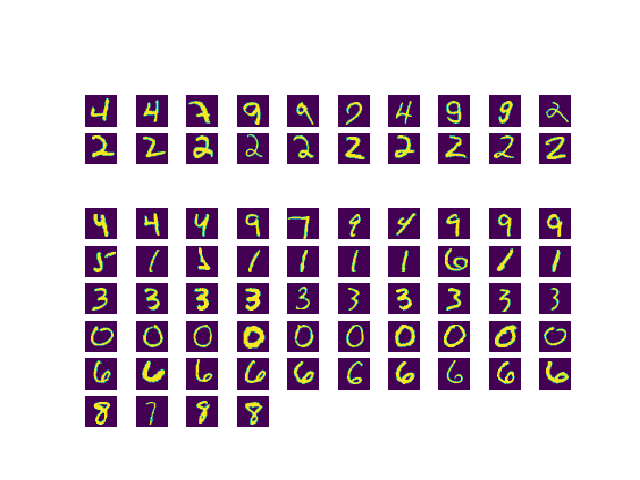

In [38]:
### Better ans



# Display grid, class->10, test_example->10
grid4 = np.zeros( (10,10) )
y_est = tf.nn.softmax(y_4)

_,y_np4_org,y_sft4 =sess.run([accuracy, y_4, y_est ], feed_dict={x: mnist.test.images[:1000,],
                                      y_: mnist.test.labels[:1000,]})


random_neuron = np.random.choice(1024, size=10, replace=False)
print('Selected Neuron:', random_neuron)


class_dict = dict()
for c in range(10):
    class_dict[c]=[]
    
print(class_dict,y_np4_org.shape)

for r in range(y_np4_org.shape[0]):
    key = np.argmax(y_np4_org[r][random_neuron])
    class_dict[key].append( (r, np.amax(y_np4_org[r][random_neuron]) ) )
    
for x in range(10):
    class_dict[x].sort(key=itemgetter(1),reverse=True)
    if len(class_dict[x]) > 10:
        class_dict[x] = class_dict[x][0:10]
    print(x, class_dict[x])

    
%matplotlib notebook
plt.figure()

c=0
for key in range(10):
    i=0
    for elem in class_dict[key]:
        plt.subplot(10,10,(c*10+i)+1)
        plt.imshow( mnist.test.images[int(elem[0])].reshape((28,28)) )
    #     plt.imshow(X[:,i].reshape((21,21)))
        plt.axis('off')
        plt.show()
        i +=1
    c+=1



    
# y_np4 = y_np4_org.T
# print (y_np4.shape, y_np4[:5,:5])
# print (y_sft4.shape, y_sft4[:5,:5])



# random_neuron = np.random.choice(1024, size=10, replace=False)
# print('Selected Neuron:', random_neuron)

# for c in range(10):
#     grid4[c] = heapq.nlargest(10, range(1000), y_np4[c].take)
#     indx = [x for x in grid4[c] if y_np4[c,x]>0]
#     print(c, grid4[c])
#     print(c, indx)
    
    
# for c in range(10):
#     grid4[c] = heapq.nlargest(10, range(1000), y_np4[ random_neuron[c] ].take)
    
# print("Grid:", grid4)

# %matplotlib notebook
# plt.figure()

# for c in range(10):
#     for i in range(10):
#         plt.subplot(10,10,(c*10+i)+1)
#         plt.imshow( mnist.test.images[int(grid4[c,i]),].reshape((28,28)) )
#     #     plt.imshow(X[:,i].reshape((21,21)))
#         plt.axis('off')
#         plt.show()
        

(1024, 1000) [[0.         0.562204   1.0128316  0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.9123582  0.         0.22026591 0.10713951 0.        ]
 [0.         0.         0.         0.         0.        ]]
(1000, 1024) [[0.         0.         0.         0.9123582  0.        ]
 [0.562204   0.         0.         0.         0.        ]
 [1.0128316  0.         0.         0.22026591 0.        ]
 [0.         0.         0.         0.10713951 0.        ]
 [0.         0.         0.         0.         0.        ]]
Selected Neuron: [ 886   49   95 1006  148  651   23  592  768  949]
Grid: [[799. 375. 396. 216. 162. 921. 612. 132. 796. 996.]
 [937. 665. 559. 461. 737. 201. 860. 602. 138. 973.]
 [799. 937. 665. 996. 612. 796. 559. 461. 974. 921.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.]
 [735. 168. 799. 265. 302. 979.  14. 276. 850. 416.]
 [937. 410. 665. 262. 461. 651. 559. 138. 607.  60.]

<IPython.core.display.Javascript object>


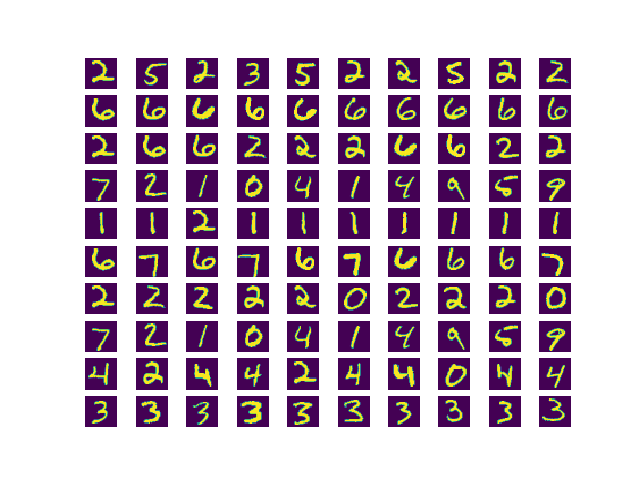

In [25]:
## Skip this part
y_np4 = y_np4_org.T
print (y_np4.shape, y_np4[:5,:5])
print (y_np4_org.shape, y_np4_org[:5,:5])

# random_neuron = np.random.randint(10, size=1024)
print('Selected Neuron:', random_neuron)
for c in range(10):
    grid4[c] = heapq.nlargest(10, range(1000), y_np4[ random_neuron[c] ].take)
    
print("Grid:", grid4)

%matplotlib notebook
plt.figure()

for c in range(10):
    for i in range(10):
        plt.subplot(10,10,(c*10+i)+1)
        plt.imshow( mnist.test.images[int(grid4[c,i]),].reshape((28,28)) )
    #     plt.imshow(X[:,i].reshape((21,21)))
        plt.axis('off')
        plt.show()

### Apply (tSNE+PCA) to plot in 2D (q5, q6)

In [10]:
from sklearn.decomposition import PCA

BATCH_SIZE = 1000
batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
batch_ys = np.argmax(batch_ys, axis=1)
# print(batch_ys)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(batch_xs)
# print ( '1st:',pca_result[:,0],'2nd:',pca_result[:,1] ,3rd:',pca_result[:,2] )
print(pca_result.shape)
print ('Explained variation per principal component:',pca.explained_variance_ratio_)


# Separate 2D point array for each class
points_0,points_1,points_2,points_3,points_4 = None, None,None, None,None
points_5,points_6,points_7,points_8,points_9 = None, None,None, None,None

for i,b in enumerate(batch_ys):
    if b ==0:
        points_0 = np.array( [ pca_result[i,:] ] ) if points_0 is None else np.concatenate( (points_0, [pca_result[i,:]]),axis=0 )
#         print(points_0.shape, points_0)
    elif b == 1:
        points_1 = np.array( [ pca_result[i,:] ] ) if points_1 is None else np.concatenate( (points_1, [pca_result[i,:]]),axis=0 )
    elif b == 2:
        points_2 = np.array( [ pca_result[i,:] ] ) if points_2 is None else np.concatenate( (points_2, [pca_result[i,:]]),axis=0 )
    elif b == 3:
        points_3 = np.array( [ pca_result[i,:] ] ) if points_3 is None else np.concatenate( (points_3, [pca_result[i,:]]),axis=0 )
    elif b == 4:
        points_4 = np.array( [ pca_result[i,:] ] ) if points_4 is None else np.concatenate( (points_4, [pca_result[i,:]]),axis=0 )
    elif b == 5:
        points_5 = np.array( [ pca_result[i,:] ] ) if points_5 is None else np.concatenate( (points_5, [pca_result[i,:]]),axis=0 )
    elif b == 6:
        points_6 = np.array( [ pca_result[i,:] ] ) if points_6 is None else np.concatenate( (points_6, [pca_result[i,:]]),axis=0 )
    elif b == 7:
        points_7 = np.array( [ pca_result[i,:] ] ) if points_7 is None else np.concatenate( (points_7, [pca_result[i,:]]),axis=0 )
    elif b == 8:
        points_8 = np.array( [ pca_result[i,:] ] ) if points_8 is None else np.concatenate( (points_8, [pca_result[i,:]]),axis=0 )
    elif b == 9:
        points_9 = np.array( [ pca_result[i,:] ] ) if points_9 is None else np.concatenate( (points_9, [pca_result[i,:]]),axis=0 )

print(points_1.shape)        
mean = np.array( [np.mean(points_0, axis=0)] )
mean = np.concatenate( (mean,np.array([np.mean(points_1, axis=0)]),np.array([np.mean(points_2, axis=0)]) ) ,axis=0)
mean = np.concatenate( (mean,np.array([np.mean(points_3, axis=0)]),np.array([np.mean(points_4, axis=0)]) ) ,axis=0)
mean = np.concatenate( (mean,np.array([np.mean(points_5, axis=0)]),np.array([np.mean(points_6, axis=0)]) ) ,axis=0)
mean = np.concatenate( (mean,np.array([np.mean(points_7, axis=0)]),np.array([np.mean(points_8, axis=0)]) ) ,axis=0)
mean = np.concatenate( (mean,np.array([np.mean(points_9, axis=0)]) ) ,axis=0)
print(mean.shape,mean)

(1000, 2)
Explained variation per principal component: [0.10175321 0.07519513]
(118, 2)
(10, 2) [[ 3.9922833   0.8530742 ]
 [-3.3588731   1.645321  ]
 [ 0.46712002  1.5306718 ]
 [ 0.2893342   1.7909312 ]
 [-0.29113746 -2.2283602 ]
 [ 0.27432504  0.39570686]
 [ 0.50796866  0.14781559]
 [-0.8231889  -2.393297  ]
 [ 0.05895329  0.587426  ]
 [-0.3932019  -2.355992  ]]


<IPython.core.display.Javascript object>


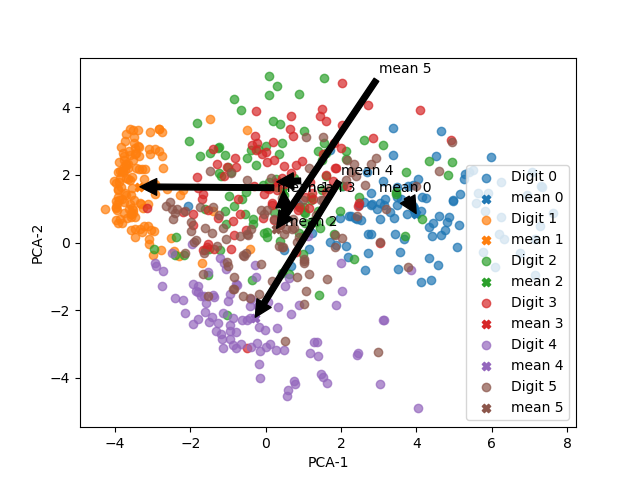

In [11]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

%matplotlib notebook
plt.figure()

plt.scatter(points_0[:,0], points_0[:,1], c=colors[0] , alpha=0.7, label='Digit 0')
plt.scatter(mean[0,0],mean[0,1], c=colors[0], alpha=1,marker='X', label='mean 0')
plt.annotate('mean 0', xy=( mean[0,0],mean[0,1] ), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.005),
            )

plt.scatter(points_1[:,0], points_1[:,1], c = colors[1] , alpha=0.7, label='Digit 1')
plt.scatter(mean[1,0],mean[1,1], c=colors[1], alpha=1,marker='X', label='mean 1')
plt.annotate('mean 1', xy=( mean[1,0],mean[1,1] ), xytext=(.3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.005),
            )

plt.scatter(points_2[:,0], points_2[:,1], c = colors[2] , alpha=0.7, label='Digit 2')
plt.scatter(mean[2,0],mean[2,1], c=colors[2], alpha=1,marker='X', label='mean 2')
plt.annotate('mean 2', xy=( mean[2,0],mean[2,1] ), xytext=(.5, .5),
            arrowprops=dict(facecolor='black', shrink=0.005),
            )

plt.scatter(points_3[:,0], points_3[:,1], c = colors[3] , alpha=0.7, label='Digit 3')
plt.scatter(mean[3,0],mean[3,1], c=colors[3], alpha=1,marker='X', label='mean 3')
plt.annotate('mean 3', xy=( mean[3,0],mean[3,1] ), xytext=(1, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.005),
            )

plt.scatter(points_4[:,0], points_4[:,1], c = colors[4] , alpha=0.7, label='Digit 4')
plt.scatter(mean[4,0],mean[4,1], c=colors[4], alpha=1,marker='X', label='mean 4')
plt.annotate('mean 4', xy=( mean[4,0],mean[4,1] ), xytext=(2, 2),
            arrowprops=dict(facecolor='black', shrink=0.005),
            )

plt.scatter(points_5[:,0], points_5[:,1], c = colors[5] , alpha=0.7, label='Digit 5')
plt.scatter(mean[5,0],mean[5,1], c=colors[5], alpha=1,marker='X', label='mean 5')
plt.annotate('mean 5', xy=( mean[5,0],mean[5,1] ), xytext=(3, 5),
            arrowprops=dict(facecolor='black', shrink=0.005),
            )

# plt.scatter(pca_result[:,0], pca_result[:,1], c=batch_ys, alpha=0.7)
# plt.scatter(0.5, 0.5, c=0, alpha=1, label='mean')
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.legend(loc=0)
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.017s...
[t-SNE] Computed neighbors for 1000 samples in 1.775s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.782237
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.398293
[t-SNE] Error after 300 iterations: 1.270397
[ 2.55558538e+00 -1.61925757e+00  4.14482403e+00 -5.76942348e+00
  1.49530897e+01  6.81338263e+00 -1.01520033e+01 -2.36843300e+00
 -9.95027006e-01 -9.89939213e+00 -5.77348804e+00 -9.77645683e+00
 -1.23264656e+01 -2.77976251e+00 -8.30248356e+00  3.26279378e+00
 -1.44334736e+01  4.76542139e+00 -2.52163363e+00 -6.70359802e+00
  9.31653500e+00 -5.57277107e+00 -7.24363327e-02  1.18002682e+01
 -1.03730106e+01 -7.91150570e-01  4.63447428e+00 -9.58705711e+00
 -6.55225897e+00 -1.64229721e-01 -1.12741995e+00  6.41165352e+00
  9.83777046e+00  3.31250405e+00  1.43984663e+00  1.34450788e+01
  2.38582182e+00  6.08346319e+00  4.00059849e-01  5.673

<IPython.core.display.Javascript object>


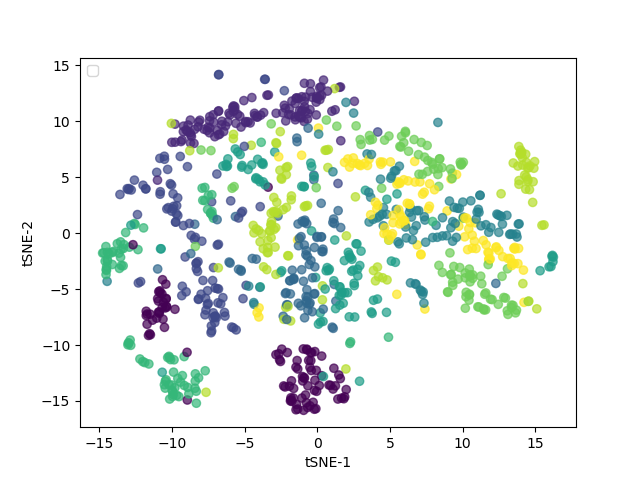

No handles with labels found to put in legend.


In [12]:
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(batch_xs)

print(tsne_results[:,0])
print(tsne_results[:,1])

%matplotlib notebook
plt.figure()
        
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=batch_ys, alpha=0.7)
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")
plt.legend(loc=2)
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.684159
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.194603
[t-SNE] Error after 300 iterations: 1.187147


<IPython.core.display.Javascript object>


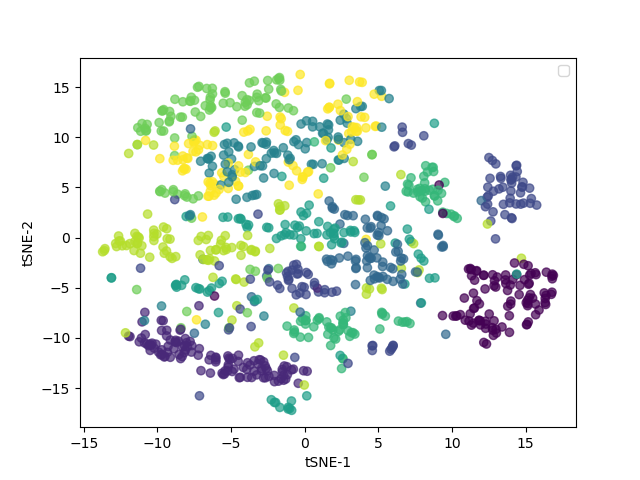

No handles with labels found to put in legend.


In [13]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(batch_xs)


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)


%matplotlib notebook
plt.figure()
        
plt.scatter(tsne_pca_results[:,0], tsne_pca_results[:,1], c=batch_ys, alpha=0.7)
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")
plt.legend()
plt.show()

### q7, q8

In [14]:
y_est_1 = tf.nn.softmax(y_1)
y_est_2 = tf.nn.softmax(y_2)
y_est_3 = tf.nn.softmax(y_3)
y_est_4 = tf.nn.softmax(y_4)
y_est_5 = tf.nn.softmax(y)

_,y_np1,y_np2,y_np3,y_np4,y_np5 =sess.run([accuracy, y_est_1,y_est_2,y_est_3,y_est_4,y_est_5 ], feed_dict={x: mnist.test.images[:1000,],
                                      y_: mnist.test.labels[:1000,]})

# _,y_np1,y_np2,y_np3,y_np4,y_np5 =sess.run([accuracy, y_1,y_2,y_3,y_4,y ], feed_dict={x: mnist.test.images[:1000,],
#                                       y_: mnist.test.labels[:1000,]})

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.147s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.002150
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.580490
[t-SNE] Error after 300 iterations: 0.870476


<IPython.core.display.Javascript object>


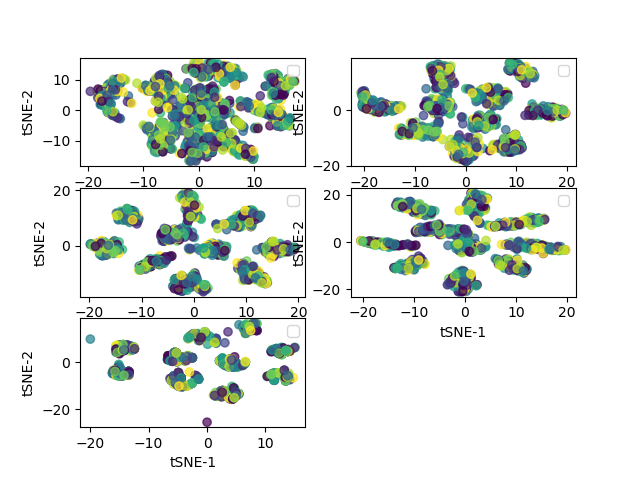

No handles with labels found to put in legend.


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.136s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.002217
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.846142


No handles with labels found to put in legend.


[t-SNE] Error after 300 iterations: 0.566579
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.155s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.003547
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.916939


No handles with labels found to put in legend.


[t-SNE] Error after 300 iterations: 0.459607
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.124s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.011131
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.107052


No handles with labels found to put in legend.


[t-SNE] Error after 300 iterations: 0.392200
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.271461


No handles with labels found to put in legend.


[t-SNE] Error after 300 iterations: 0.323953


In [15]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(y_np1)


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)


%matplotlib notebook
plt.figure()

plt.subplot(3,2,1)
plt.scatter(tsne_pca_results[:,0], tsne_pca_results[:,1], c=batch_ys, alpha=0.7)
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")
plt.legend()
plt.show()


pca_result_50 = pca_50.fit_transform(y_np2)
tsne_pca_results = tsne.fit_transform(pca_result_50)

# %matplotlib notebook
# plt.figure()
plt.subplot(3,2,2) 
plt.scatter(tsne_pca_results[:,0], tsne_pca_results[:,1], c=batch_ys, alpha=0.7)
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")
plt.legend()
plt.show()



pca_result_50 = pca_50.fit_transform(y_np3)
tsne_pca_results = tsne.fit_transform(pca_result_50)

# %matplotlib notebook
# plt.figure()
plt.subplot(3,2,3) 
plt.scatter(tsne_pca_results[:,0], tsne_pca_results[:,1], c=batch_ys, alpha=0.7)
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")
plt.legend()
plt.show()



pca_result_50 = pca_50.fit_transform(y_np4)
tsne_pca_results = tsne.fit_transform(pca_result_50)

# %matplotlib notebook
# plt.figure()
plt.subplot(3,2,4)     
plt.scatter(tsne_pca_results[:,0], tsne_pca_results[:,1], c=batch_ys, alpha=0.7)
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")
plt.legend()
plt.show()




pca_5 = PCA(n_components=5)
pca_result_5 = pca_5.fit_transform(y_np5)
tsne_pca_results = tsne.fit_transform(pca_result_5)

# %matplotlib notebook
# plt.figure()
plt.subplot(3,2,5)
plt.scatter(tsne_pca_results[:,0], tsne_pca_results[:,1], c=batch_ys, alpha=0.7)
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")
plt.legend()
plt.show()